In [12]:
vi = 0.01

Vol = vi*10**(-14); NA = 6.02*10**(23); Cal = NA*Vol*10**(-6)

TC = 0.158

kc1 = 0.15*Cal*TC
# production of p53 [molecules/min]

kc2 = 0.1*TC
# degradation of p53 by mdm2 [1/min]

kc3 = 0.1*Cal
# degradation of p53 by mdm2 [molecules]

kc4 = 0.1/Cal*TC
# production of mdm2 - mRNA [1/(molecules*min)]

kc5 = 0.1*TC 
# degradation of mdm2 - mRNA [1/min]

kc6 = 0.2*TC 
# production of mdm2 [1/min]

kc7 = 0.1*TC 
# degradation of mdm2 [1/min]

kc8 = 0.0036 
# binding of mdm2 and nutlin [1/(molecules*min)]

In [17]:
t_samlet = (0, 50000)

p0, m0, Mf0, Mb0, n0 = 1, 1, 1, 1, 1

y0 = [p0, m0, Mf0, Mb0, n0]

In [23]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

def p_change(t, p, m, Mf, Mb, n):
    dpdt = kc1 - kc2*Mf*(p / (kc3 + p))
    return dpdt

def m_change(t, p, m, Mf, Mb, n):
    dmdt = (kc4 * p**2 - kc5 * m)
    return dmdt

def M_free_change(t, p, m, Mf, Mb, n):
    dM_freedt = kc6 * m - kc7 * Mf - kc8*n*Mf
    return dM_freedt

def M_bound_change(t, p, m, Mf, Mb, n):
    dM_bounddt = kc7*Mb + kc8*n*Mf
    return dM_bounddt

def n_change(t, p, m, Mf, Mb, n):
    dndt = -kc8*n*Mf
    return dndt

def samlet_system(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = p_change(t, *y)
    dydt[1] = m_change(t, *y)
    dydt[2] = M_free_change(t, *y)
    dydt[3] = M_bound_change(t, *y)
    dydt[4] = n_change(t, *y)
    return dydt

In [24]:
samlet_løsning = sp.solve_ivp(samlet_system, t_samlet, y0, method='RK45')

/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ivp/rk.py:64: RuntimeWarning: overflow encountered in add
  K[s] = fun(t + c * h, y + dy)


In [30]:
t, p, m, Mf, Mb, n = samlet_løsning["t"], samlet_løsning["y"][0], samlet_løsning["y"][1], samlet_løsning["y"][2], samlet_løsning["y"][3], samlet_løsning["y"][4]

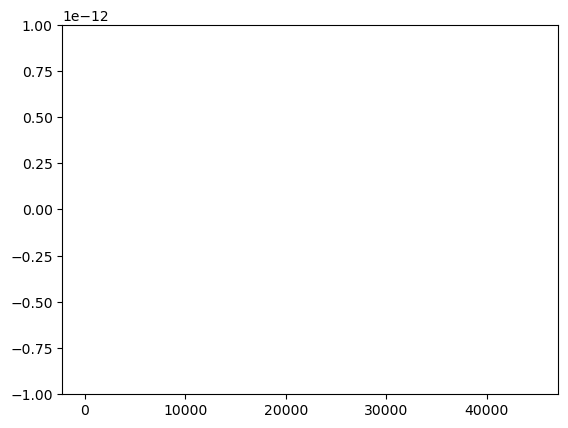

In [37]:
plt.plot(samlet_løsning["t"], samlet_løsning["y"][0])
# plt.plot(t, m)
# plt.plot(t, Mf)
plt.plot(t, Mb)
# plt.plot(t, n)

/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_base.py:2917: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


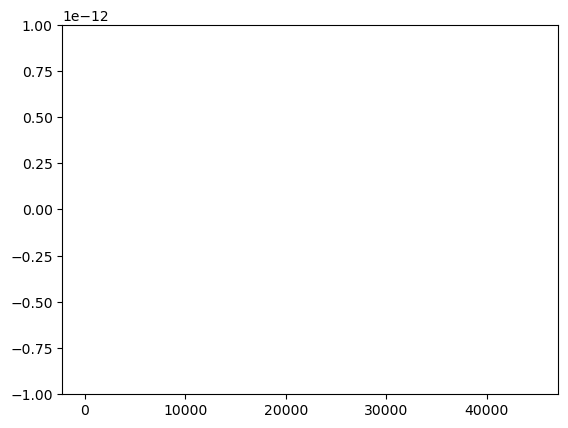

In [39]:
plt.plot(t,Mb)